Web Scrape the following websitehttps://
www.cnbc.com/search/?query=green%20hydrogen&qsearchterm=green%20hydrogen


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Initialize lists to store scraped data
dates = []
headlines = []
sources = []

# URL to scrape
url = 'https://www.cnbc.com/search/?query=green%20hydrogen&qsearchterm=green%20hydrogen'

# Set custom headers for the User-Agent


# Make the request to the website with custom headers
r = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(r.text, 'html.parser')

# Now you can proceed with parsing the HTML content and extracting the desired information
soup

<!DOCTYPE html>
<html itemscope="" itemtype="https://schema.org/WebPage" lang="en" prefix="og=https://ogp.me/ns#"><head><meta content="max-image-preview:large" name="robots"/><meta content="telephone=no" name="format-detection"/><meta content="noindex, nofollow" name="robots"/><link href="https://sc.cnbcfm.com/applications/cnbc.com/staticcontent/img/favicon.ico" rel="icon" type="image/x-icon"/><style type="text/css">@charset "UTF-8";.Modal-modalBackground{background:#000000b3;height:100%;left:0;overflow-y:auto;position:fixed;top:0;transition:background-color .4s;width:100%;z-index:100001}.Modal-bottomModal.Modal-modal{background:#f8f8f8;border-radius:3px;bottom:0;box-shadow:5px 5px 20px #1717171a;display:inline-block;height:528px;left:0;margin-top:0!important;max-width:100%;position:fixed;top:auto;transform:none;width:100%}@media (max-width:1019px){.Modal-bottomModal.Modal-modal{height:642px}}@media (max-width:759px){.Modal-bottomModal.Modal-modal{height:100%;position:relative;top:0}}.

In [ ]:
# You can include this code in your setup instructions
!pip install selenium
!pip install pyvirtualdisplay
!pip install webdriver-manager
!pip install chromedriver_autoinstaller
!apt-get install -y xvfb
!apt install chromium-chromedriver


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.8).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu2.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [ ]:
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

# initialize webdriver
driver = webdriver.Chrome(options=chrome_options)

# navigate to the URL
driver.get('https://www.cnbc.com/search/?query=green%20hydrogen&qsearchterm=green%20hydrogen')

time.sleep(5)  # Wait for page to fully load

# extract HTML source
html = driver.page_source

# parse HTML with BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Find elements and extract data
for i in soup.find_all('span', class_='Card-title'):
    print(i.get_text())

Saudi Arabia’s ACWA Power to develop largest green hydrogen project in Indonesia worth over $1 ...
TES CEO: 2024 must be a year of delivery for green goals
‘Europe does not have an incentive program’ for green hydrogen, says Clariant CEO
Top Biden official at Senate hearing defends liquefied natural gas pause
The hydrogen stock bubble burst, but Bernstein says it’s time for a second look at ...
There’s a lot of talk about hydrogen’s potential. But transportation costs represent a big challenge
‘We need everything’: CEO on why natural gas infrastructure needs to be ready for clean ...
Biden’s Inflation Reduction Act makes green hydrogen profitable at scale, Goldman Sachs says
In Australia, firms plan ‘super hub’ to produce green hydrogen using wind and solar
This green hydrogen stock can rally more than 20%, says Citi


In [ ]:
last_height = driver.execute_script('return document.body.scrollHeight')
from selenium.webdriver.common.by import By

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
import time
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException

from datetime import datetime

# Function to check if a string is a date
def is_date(string):
    try:
        datetime.strptime(string, '%m/%d/%Y %I:%M:%S %p')
        return True
    except ValueError:
        return False

# load target website
url = 'https://www.cnbc.com/search/?query=green%20hydrogen&qsearchterm=green%20hydrogen'

# get website content
driver.get(url)
# set target count
itemTargetCount = 500
heads=[]
dates=[]
sources=[]
# scroll to bottom of webpage
i=0
while itemTargetCount > len(heads):
    i+=1

    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')

    # wait for content to load
    time.sleep(1)

    new_height = driver.execute_script('return document.body.scrollHeight')

    if new_height == last_height:
        print('broke')
        break

    elif i==itemTargetCount:
        break

    last_height == new_height

    # select elements by XPath for HEadline
    try:
        elements = driver.find_elements(By.XPATH, f'//*[@id="searchcontainer"]/div[{i}]/div/div[2]/div[2]/a/span')# '//*[@id="searchcontainer"]/div[1]/div/div[2]/div[2]/a/span' '//*[@id="searchcontainer"]/div[2]/div/div[2]/div[2]/a/span' '//*[@id="searchcontainer"]/div[4]/div/div[2]/div[2]/a/span'
        h4_texts = [element.text for element in elements] # //*[@id="searchcontainer"]/div[486]/div/div[2]/div[2]/a/span
        heads.extend(h4_texts)
    except StaleElementReferenceException:
        continue

    elements2 = driver.find_elements(By.XPATH, f'//*[@id="searchcontainer"]/div[{i}]/div/div[2]/div[1]/a')# '//*[@id="searchcontainer"]/div[1]/div/div[2]/div[2]/a/span' '//*[@id="searchcontainer"]/div[2]/div/div[2]/div[2]/a/span' '//*[@id="searchcontainer"]/div[4]/div/div[2]/div[2]/a/span'
    h6 = [element.text for element in elements2] # //*[@id="searchcontainer"]/div[486]/div/div[2]/div[2]/a/span
    sources.extend(h6)

    try:
        # Try to find the first element
        element1 = driver.find_elements(By.XPATH,f'//*[@id="searchcontainer"]/div[{i}]/div/div[2]/span/span[2]')
        # If the element is found, do something with it
        # For example, get its text content
        h5=[element.text for element in element1]
        if is_date(''.join(h5)):
            dates.extend(h5)
        else:
            # If it's not a date, we assume it's a name and continue to the next iteration
            continue
        dates.extend(h5)

    except NoSuchElementException:
        # If the first element is not found, try the second one
        try:
            element1 = driver.find_elements(By.XPATH,f'//*[@id="searchcontainer"]/div[{i}]/div/div[2]/span/span[2]')
            # If the second element is found, do something with it

            h5=[element.text for element in element1]
            if is_date(''.join(h5)):
                dates.extend(h5)
            else:
                # If it's not a date, we assume it's a name and continue to the next iteration
                continue
            dates.extend(h5)

        except NoSuchElementException:
            # If neither element is found, you can choose to pass or handle it differently
            pass

    print(i,end=' ')


5 6 7 8 9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 49 50 51 52 53 54 55 56 58 59 60 61 62 64 65 66 67 69 70 71 72 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 95 96 97 98 99 100 101 103 104 105 106 107 108 109 110 111 112 114 115 117 118 119 120 121 122 123 124 125 126 127 128 129 130 132 133 134 137 138 140 142 144 145 146 148 149 152 154 156 157 158 159 160 162 163 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 191 192 193 195 197 198 200 201 202 203 204 205 206 207 208 209 210 211 212 214 215 216 217 218 219 220 221 223 224 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 284 285 286 287 288 289 290 291 292 293 295 296 297 298 299 300 302 303 304 305 307 308 309 310 311 313 315 316

In [ ]:
len(heads),len(dates) , len(sources)


(476, 858, 476)

In [ ]:
from collections import OrderedDict

# Remove duplicates while preserving order
filtered_sources = list(OrderedDict.fromkeys(sources))
filtered_heads = list(OrderedDict.fromkeys(heads))
filtered_dates = list(OrderedDict.fromkeys(dates))

# Extract only the date strings without the time component
dates_only = [dt.split(' ')[0] for dt in filtered_dates]

# Printing the lengths of the lists
print(len(dates_only), len(filtered_heads), len(filtered_sources))


421 466 103


In [ ]:
a = []
b = []
for i in range(len(heads)):
    if heads[i] not in a:
        a.append(heads[i])
    elif heads[i] in a:
        b.append(heads[i])
dates1 = dates
dates2 = dates[355:]
len(dates2)
main_dates = dates + dates2

# Ensure all lists have the same length
min_length = min(len(main_dates), len(heads), len(sources))
main_dates = main_dates[:min_length]
heads = heads[:min_length]
sources = sources[:min_length]

# Create a DataFrame
import pandas as pd

df = pd.DataFrame({
    'Date': main_dates,
    'Headline': heads,
    'Source': sources
})

# Add string ' -: CNBC' to 'Source' column
df['Source'] = df['Source'] + ' -: CNBC'

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])#, format='%d/%m/%Y')

# Display DataFrame
df.head()


,Date,Headline,Source
0,2023-08-11 19:18:35,Saudi Arabia’s ACWA Power to develop largest g...,CAPITAL CONNECTION -: CNBC
1,2023-08-11 19:18:35,‘Europe does not have an incentive program’ fo...,DAVOS WEF -: CNBC
2,2023-07-04 08:20:24,TES CEO: 2024 must be a year of delivery for g...,DAVOS WEF -: CNBC
3,2023-07-04 08:20:24,Top Biden official at Senate hearing defends l...,POLITICS -: CNBC
4,2023-11-09 10:00:18,"The hydrogen stock bubble burst, but Bernstein...",PRO: INVESTING TRENDS -: CNBC


Use google news rss feed to get all news headline having “green hydrogen” as keyword- https://
news.google.com/rss/search?q=green%20hydrogen&hl=en-IN&gl=IN&ceid=IN:en


In [ ]:
!pip install feedparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6048 sha256=a0c6616d72070305376330ff3f50b1bb11caee1d5b8d711e47a88ff83083cebd
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [ ]:
import feedparser

# URL for Google News RSS feed
rss_url = "https://news.google.com/rss/search?q=green%20hydrogen&hl=en-IN&gl=IN&ceid=IN:en"

# Parse the RSS feed
feed = feedparser.parse(rss_url)

# Extracting headlines and sources
google_news_headlines = [entry.title for entry in feed.entries]
google_news_sources = [entry.source.title for entry in feed.entries]
google_news_dates = [entry.published for entry in feed.entries]

# Create DataFrame
google_news_df = pd.DataFrame({
    'Date': google_news_dates,
    'Headline': google_news_headlines,
    'Source': google_news_sources
})

# Add suffix to Source
google_news_df['Source'] = google_news_df['Source'] + ' -: Google News'

# Convert 'Date' column to datetime
google_news_df['Date'] = pd.to_datetime(google_news_df['Date'])

# Display DataFrame
google_news_df.head()


,Date,Headline,Source
0,2024-02-10 14:00:02+00:00,A scalable photoelectrochemical system for gre...,Tech Xplore -: Google News
1,2024-02-09 13:40:44+00:00,"IGX, Acme to develop green hydrogen, ammonia m...",Mint -: Google News
2,2024-02-09 05:24:52+00:00,Hydrogen revenue jumps for world's biggest mak...,ETEnergyWorld -: Google News
3,2024-02-08 11:24:20+00:00,India Awards Tenders for 4.12 Lakh Tonnes of G...,SolarQuarter -: Google News
4,2024-02-09 12:00:46+00:00,"Government releases guidelines, allocates Rs 4...",Down To Earth Magazine -: Google News


Store the result in a pandas dataframe also include News date

In [ ]:
# Concatenate both dataframes
merged_df = pd.concat([df, google_news_df], ignore_index=True)

# Display merged dataframe
merged_df


,Date,Headline,Source
0,2023-08-11 19:18:35,Saudi Arabia’s ACWA Power to develop largest g...,CAPITAL CONNECTION -: CNBC
1,2023-08-11 19:18:35,‘Europe does not have an incentive program’ fo...,DAVOS WEF -: CNBC
2,2023-07-04 08:20:24,TES CEO: 2024 must be a year of delivery for g...,DAVOS WEF -: CNBC
3,2023-07-04 08:20:24,Top Biden official at Senate hearing defends l...,POLITICS -: CNBC
4,2023-11-09 10:00:18,"The hydrogen stock bubble burst, but Bernstein...",PRO: INVESTING TRENDS -: CNBC
...,...,...,...
571,2023-10-10 07:00:00+00:00,Cutting-edge quantum-technology backed green h...,Department Of Science & Technology -: Google News
572,2024-02-05 10:44:04+00:00,Govt greenlights pilot projects for Green Hydr...,Construction World -: Google News
573,2024-02-05 14:09:42+00:00,MNRE releases guidelines for pilot projects on...,Press Trust of India -: Google News
574,2023-11-28 08:00:00+00:00,Adani Total Gas unveils green hydrogen blendin...,Business Today -: Google News


In [ ]:
# Convert 'Date' column to datetime format and localize to UTC
merged_df['Date'] = pd.to_datetime(merged_df['Date'], utc=True)

# Format the 'Date' column
merged_df['Date'] = merged_df['Date'].dt.strftime('%Y-%m-%d')

# Display the modified merged dataframe
merged_df


,Date,Headline,Source
0,2023-08-11,Saudi Arabia’s ACWA Power to develop largest g...,CAPITAL CONNECTION -: CNBC
1,2023-08-11,‘Europe does not have an incentive program’ fo...,DAVOS WEF -: CNBC
2,2023-07-04,TES CEO: 2024 must be a year of delivery for g...,DAVOS WEF -: CNBC
3,2023-07-04,Top Biden official at Senate hearing defends l...,POLITICS -: CNBC
4,2023-11-09,"The hydrogen stock bubble burst, but Bernstein...",PRO: INVESTING TRENDS -: CNBC
...,...,...,...
571,2023-10-10,Cutting-edge quantum-technology backed green h...,Department Of Science & Technology -: Google News
572,2024-02-05,Govt greenlights pilot projects for Green Hydr...,Construction World -: Google News
573,2024-02-05,MNRE releases guidelines for pilot projects on...,Press Trust of India -: Google News
574,2023-11-28,Adani Total Gas unveils green hydrogen blendin...,Business Today -: Google News


In [ ]:
main_df = merged_df.copy()

main_df

,Date,Headline,Source
0,2023-08-11,Saudi Arabia’s ACWA Power to develop largest g...,CAPITAL CONNECTION -: CNBC
1,2023-08-11,‘Europe does not have an incentive program’ fo...,DAVOS WEF -: CNBC
2,2023-07-04,TES CEO: 2024 must be a year of delivery for g...,DAVOS WEF -: CNBC
3,2023-07-04,Top Biden official at Senate hearing defends l...,POLITICS -: CNBC
4,2023-11-09,"The hydrogen stock bubble burst, but Bernstein...",PRO: INVESTING TRENDS -: CNBC
...,...,...,...
571,2023-10-10,Cutting-edge quantum-technology backed green h...,Department Of Science & Technology -: Google News
572,2024-02-05,Govt greenlights pilot projects for Green Hydr...,Construction World -: Google News
573,2024-02-05,MNRE releases guidelines for pilot projects on...,Press Trust of India -: Google News
574,2023-11-28,Adani Total Gas unveils green hydrogen blendin...,Business Today -: Google News


Use pandas.DataFrame.apply to add an extra column in this table called sentiment score. For
sentiment analysis use a pre-trained sentiment analysis model on huggingface

In [ ]:
!pip3 install emoji==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49719 sha256=bbad358fbb57fff23a6a7e010d83a95c68014c8aa4445b56d99268805cf30999
  Stored in directory: /root/.cache/pip/wheels/1b/bd/d9/310c33c45a553798a714e27e3b8395d37128425442b8c78e07
Successfully built emoji


In [ ]:
import pandas as pd
from transformers import pipeline

# Load the sentiment analysis model from Hugging Face (using finiteautomata/bertweet-base-sentiment-analysis)
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

# Function to apply sentiment analysis on each headline
def get_sentiment_score(row):
    # Extract headline from the row
    headline = row['Headline']
    # Perform sentiment analysis on the headline
    sentiment = specific_model(headline)[0]
    # Return the sentiment score
    return sentiment['score']

# Assuming 'main_df' is your dataframe
main_df['sentiment_score'] = main_df.apply(get_sentiment_score, axis=1)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [ ]:
main_df

,Date,Headline,Source,sentiment_score
0,2023-08-11,Saudi Arabia’s ACWA Power to develop largest g...,CAPITAL CONNECTION -: CNBC,0.872736
1,2023-08-11,‘Europe does not have an incentive program’ fo...,DAVOS WEF -: CNBC,0.590377
2,2023-07-04,TES CEO: 2024 must be a year of delivery for g...,DAVOS WEF -: CNBC,0.600250
3,2023-07-04,Top Biden official at Senate hearing defends l...,POLITICS -: CNBC,0.886418
4,2023-11-09,"The hydrogen stock bubble burst, but Bernstein...",PRO: INVESTING TRENDS -: CNBC,0.941269
...,...,...,...,...
571,2023-10-10,Cutting-edge quantum-technology backed green h...,Department Of Science & Technology -: Google News,0.874043
572,2024-02-05,Govt greenlights pilot projects for Green Hydr...,Construction World -: Google News,0.602321
573,2024-02-05,MNRE releases guidelines for pilot projects on...,Press Trust of India -: Google News,0.933379
574,2023-11-28,Adani Total Gas unveils green hydrogen blendin...,Business Today -: Google News,0.939189


Use appropriate hugging face NER (Named Entity Recognition) model to identify all organization
name in news headline

In [ ]:
# Load the NER pipeline
from transformers import pipeline
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", aggregation_strategy="simple")

# Function to extract organizations
def extract_organizations(text):
    entities = ner_pipeline(text)
    organizations = [entity['word'] for entity in entities if entity['entity_group'] == 'ORG']
    return organizations

# Assuming 'main_df' is your dataframe
main_df['organizations'] = main_df['Headline'].apply(extract_organizations)

# Display the modified dataframe with organization names extracted
print(main_df)


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

           Date                                           Headline  \
0    2023-08-11  Saudi Arabia’s ACWA Power to develop largest g...   
1    2023-08-11  ‘Europe does not have an incentive program’ fo...   
2    2023-07-04  TES CEO: 2024 must be a year of delivery for g...   
3    2023-07-04  Top Biden official at Senate hearing defends l...   
4    2023-11-09  The hydrogen stock bubble burst, but Bernstein...   
..          ...                                                ...   
571  2023-10-10  Cutting-edge quantum-technology backed green h...   
572  2024-02-05  Govt greenlights pilot projects for Green Hydr...   
573  2024-02-05  MNRE releases guidelines for pilot projects on...   
574  2023-11-28  Adani Total Gas unveils green hydrogen blendin...   
575  2024-02-07  Commercial production of green hydrogen - The ...   

                                                Source  sentiment_score  \
0                           CAPITAL CONNECTION -: CNBC         0.872736   
1        

In [ ]:
extract_organizations('Saudi Arabia’s ACWA Power to develop largest green hydrogen project in Indonesia worth over $1 ')

['ACWA Power']

In [ ]:
main_df


,Date,Headline,Source,sentiment_score,organizations
0,2023-08-11,Saudi Arabia’s ACWA Power to develop largest g...,CAPITAL CONNECTION -: CNBC,0.872736,[ACWA Power]
1,2023-08-11,‘Europe does not have an incentive program’ fo...,DAVOS WEF -: CNBC,0.590377,[Clariant]
2,2023-07-04,TES CEO: 2024 must be a year of delivery for g...,DAVOS WEF -: CNBC,0.600250,"[T, ##ES]"
3,2023-07-04,Top Biden official at Senate hearing defends l...,POLITICS -: CNBC,0.886418,"[##iden, Senate]"
4,2023-11-09,"The hydrogen stock bubble burst, but Bernstein...",PRO: INVESTING TRENDS -: CNBC,0.941269,[]
...,...,...,...,...,...
571,2023-10-10,Cutting-edge quantum-technology backed green h...,Department Of Science & Technology -: Google News,0.874043,[Department Of Science & Technology]
572,2024-02-05,Govt greenlights pilot projects for Green Hydr...,Construction World -: Google News,0.602321,"[Green Hydrogen, Construction World]"
573,2024-02-05,MNRE releases guidelines for pilot projects on...,Press Trust of India -: Google News,0.933379,"[MNRE, Press Trust of India]"
574,2023-11-28,Adani Total Gas unveils green hydrogen blendin...,Business Today -: Google News,0.939189,"[Adani Total Gas, Business Today]"


In [ ]:
main_df['organizations'] = main_df['Headline'].apply(lambda x: ', '.join([entity['word'] for entity in ner_pipeline(x) if entity['entity_group'] == 'ORG']))
# Replace empty strings with NaN
main_df['organizations'].replace('', float('nan'), inplace=True)

# Display the modified dataframe with organization names extracted
main_df

,Date,Headline,Source,sentiment_score,organizations,Week
0,2023-08-11,Saudi Arabia’s ACWA Power to develop largest g...,CAPITAL CONNECTION -: CNBC,0.8727,ACWA Power,32
1,2023-08-11,‘Europe does not have an incentive program’ fo...,DAVOS WEF -: CNBC,0.5904,Clariant,32
2,2023-07-04,TES CEO: 2024 must be a year of delivery for g...,DAVOS WEF -: CNBC,0.6002,"T, ##ES",27
3,2023-07-04,Top Biden official at Senate hearing defends l...,POLITICS -: CNBC,0.8864,"##iden, Senate",27
4,2023-11-09,"The hydrogen stock bubble burst, but Bernstein...",PRO: INVESTING TRENDS -: CNBC,0.9413,NaN,45
...,...,...,...,...,...,...
571,2023-10-10,Cutting-edge quantum-technology backed green h...,Department Of Science & Technology -: Google News,0.8740,Department Of Science & Technology,41
572,2024-02-05,Govt greenlights pilot projects for Green Hydr...,Construction World -: Google News,0.6023,"Green Hydrogen, Construction World",6
573,2024-02-05,MNRE releases guidelines for pilot projects on...,Press Trust of India -: Google News,0.9334,"MNRE, Press Trust of India",6
574,2023-11-28,Adani Total Gas unveils green hydrogen blendin...,Business Today -: Google News,0.9392,"Adani Total Gas, Business Today",48


csv table containing news Date, headline and source

In [ ]:
import pandas as pd

# Assuming 'main_df' is your dataframe containing the required data
# Create a CSV file from the dataframe
main_df[['Date', 'Headline', 'Source']].to_csv('news_data.csv', index=False)


Using google sheet python api transfer this csv table to a google sheet with access right to
“Anyone with the Link”

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
from google.auth.transport.requests import Request
from google.oauth2 import service_account
import pandas as pd
from google.colab import files

# Authenticate and create Google Sheets client
creds, _ = default()
gc = gspread.authorize(creds)

# Define the file path
csv_file_path = "/content/news_data.csv"

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Create a new Google Sheet
sh = gc.create('New Google Sheet')

# Open the first sheet
worksheet = sh.sheet1

# Update the sheet with CSV data
worksheet.update([df.columns.values.tolist()] + df.values.tolist())

# Share the Google Sheet with anyone with the link
sh.share("", perm_type='anyone', role='reader', notify=False)

# Print the URL of the Google Sheet
print("URL of the Google Sheet:", sh.url)

URL of the Google Sheet: https://docs.google.com/spreadsheets/d/18hdHy4vecsv3zOMsRWBHfospQwBbdJVsaIup0XrmxAU


Graph which shows Week wise trend of average sentiment score for all the news in that
particular week

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

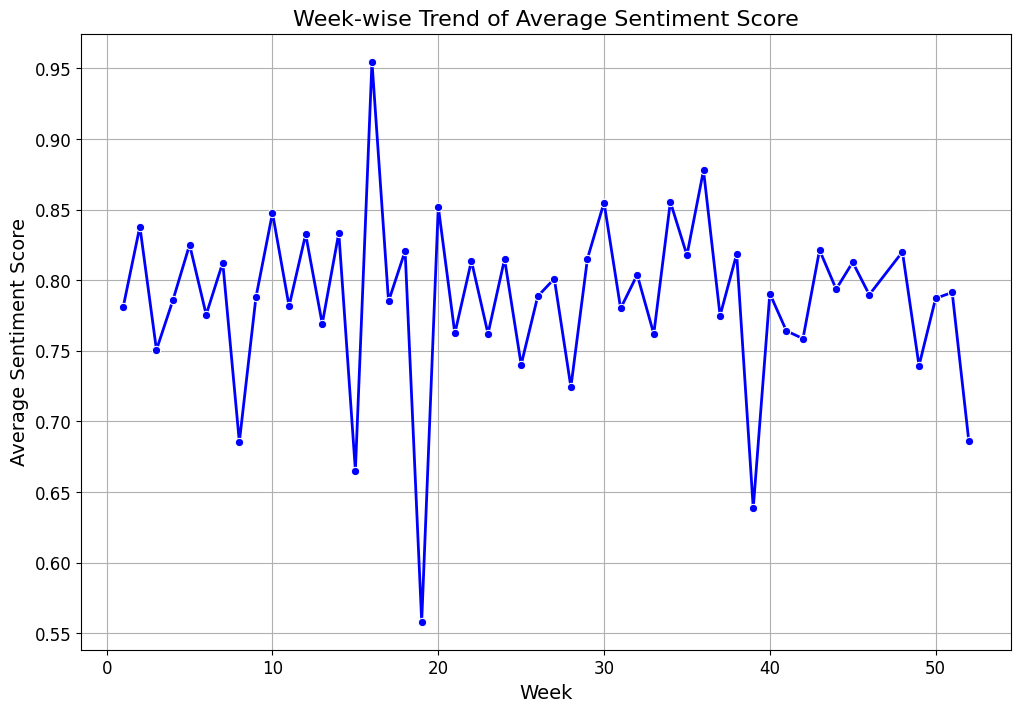

In [ ]:
# Calculate week number
main_df['Week'] = main_df['Date'].dt.isocalendar().week

# Group by week and calculate the average sentiment score
weekly_sentiment = main_df.groupby('Week')['sentiment_score'].mean().reset_index()

# Plotting the graph with Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=weekly_sentiment, x='Week', y='sentiment_score', marker='o', color='blue', linewidth=2)
plt.title('Week-wise Trend of Average Sentiment Score', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Average Sentiment Score', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Word cloud map with organization name identified in the News headline

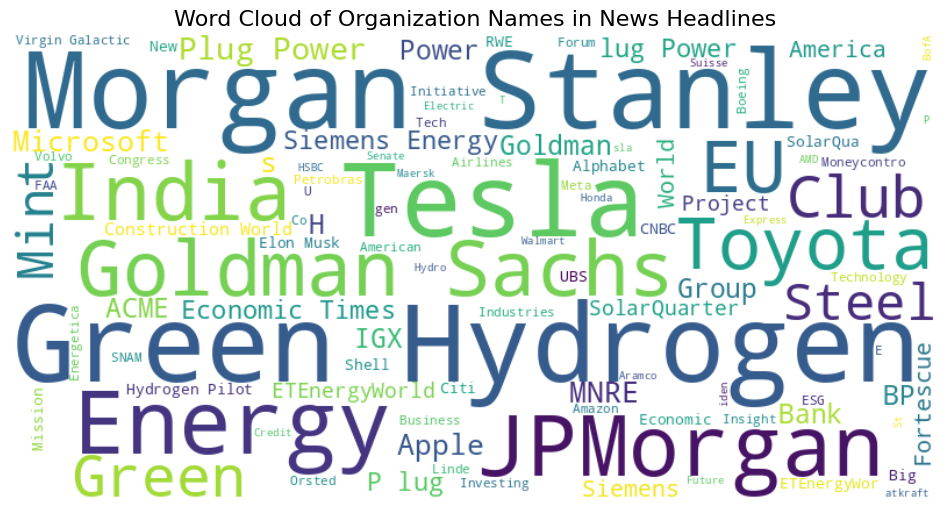

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of organization names
all_organizations = [org for sublist in main_df['organizations'].dropna() for org in sublist]

# Convert the flattened list to a single string
all_organizations_str = ','.join(all_organizations)

# Generate word cloud with custom settings
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=100, contour_color='steelblue',
                      contour_width=2).generate(all_organizations_str)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Organization Names in News Headlines', fontsize=16)
plt.axis('off')
plt.show()
